# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [261]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [262]:
print("Для того, чтобы эксперимент был воспроизводимым с теми же параметрами и выдавал одни и те же результаты при каждом запуске.\
 \nИстинно случайных чисел компьютер генерировать не умеет, а умеет только псевдослучайные, поэтому фиксируя сид мы как бы фиксируем конкретную реализацию случайной величины\
 \nи делаем результат определёнными")

Для того, чтобы эксперимент был воспроизводимым с теми же параметрами и выдавал одни и те же результаты при каждом запуске. 
Истинно случайных чисел компьютер генерировать не умеет, а умеет только псевдослучайные, поэтому фиксируя сид мы как бы фиксируем конкретную реализацию случайной величины 
и делаем результат определёнными


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [263]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [264]:
df_train.sample(10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [265]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [266]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [267]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [268]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [269]:
pd.concat([df_train, df_test]).reset_index(drop=True).isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [270]:
print('Пропуски есть в колонках:')

for i in pd.concat([df_train, df_test]).reset_index(drop=True).isna().any().index:
    if pd.concat([df_train, df_test]).reset_index(drop=True).isna().any()[i] == True:
        print(i)

Пропуски есть в колонках:
mileage
engine
max_power
torque
seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [271]:
doubles = df_train.drop(columns='selling_price').duplicated(keep=False)
doubles.sum()

1799

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [272]:
df_train.drop(columns='selling_price')[doubles]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [273]:
first_drop = df_train.drop_duplicates(keep='first')

idx = first_drop.drop(columns='selling_price').drop_duplicates(keep='first').index

df_train = first_drop[pd.Series(dict((x, x in idx) for x in first_drop.index))].copy()

In [274]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [275]:
df_train = df_train.reset_index(drop=True)
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [276]:
import re

## mileage

In [277]:
def nums_only(df_train, df_test, col):
  contains = {
              'df_train':  df_train[col].map(lambda x: re.findall('[^0-9^\.]', str(x)) == []).any(),
              'df_test' :   df_test[col].map(lambda x: re.findall('[^0-9^\.]', str(x)) == []).any()
  }
  return contains

# единицы измерения / пробелы / символы кроме чисел есть во всех объектах
nums_only(df_train, df_test, 'mileage')

{'df_train': False, 'df_test': False}

In [278]:
def non_digit_set(df_train, df_test, col):
  sets = {
          'df_train':    set(map(lambda x: ''.join(re.findall('[^0-9^\.]', str(x))), df_train[col].values)),
          'df_test' :    set(map(lambda x: ''.join(re.findall('[^0-9^\.]', str(x))),  df_test[col].values))
  }
  return sets

# Посмотрим на всё, что не является цифрами, и множество всех возможных значений этого всего
non_digit_set(df_train, df_test, 'mileage')

{'df_train': {' km/kg', ' kmpl', 'nan'}, 'df_test': {' km/kg', ' kmpl', 'nan'}}

In [279]:
def empty_strings(df_train, df_test, col):
  return {
          'df_train' : df_train[df_train[col].str.contains('^$')],
          'df_test'  :   df_test[df_test[col].str.contains('^$')]
         }

In [280]:
# Уберём единицы измерения и кастанём к float
df_train['mileage'] = df_train['mileage'].map( lambda x: float(\
                                                               str(x)\
                                                               .rstrip(' kmpl')\
                                                               .rstrip(' km/kg') 
                                                               ))

df_test['mileage']  = df_test['mileage'].map(  lambda x: float(\
                                                              str(x)\
                                                              .rstrip(' kmpl')\
                                                              .rstrip(' km/kg') 
                                                              ))



In [281]:
df_train['mileage'].head()

0    23.40
1    21.14
2    23.00
3    16.10
4    20.14
Name: mileage, dtype: float64

In [282]:
df_test['mileage'].head()

0    14.0
1    21.5
2    12.9
3    25.1
4    16.5
Name: mileage, dtype: float64

In [283]:
#Проверка
nums_only(df_train, df_test, 'mileage')

{'df_train': True, 'df_test': True}

In [284]:
non_digit_set(df_train, df_test, 'mileage')

{'df_train': {'', 'nan'}, 'df_test': {'', 'nan'}}

In [285]:
# Просто пустых значений нет - это хорошо
df_train[df_train['mileage'].astype('string').str.contains('^$')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [286]:
# В тесте тоже
df_test[df_test['mileage'].astype('string').str.contains('^$')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


## engine

In [287]:
# Единицы измерения / пробелы есть во всех объектах
print(nums_only(df_train, df_test, 'engine'))

# Посмотрим на всё, что не является цифрами, и множество всех возможных значений этого всего
print(non_digit_set(df_train, df_test, 'engine'))

{'df_train': False, 'df_test': False}
{'df_train': {' CC', 'nan'}, 'df_test': {' CC', 'nan'}}


In [288]:
# Уберём единицы измерения и кастанём к float
df_train['engine'] = df_train['engine'].map( lambda x: float(\
                                                             str(x)\
                                                             .rstrip(' CC')\
                                                            ))
df_test['engine'] = df_test['engine'].map( lambda x: float(\
                                                           str(x)\
                                                           .rstrip(' CC')\
                                                          ))

In [289]:
df_train['engine'].head()

0    1248.0
1    1498.0
2    1396.0
3    1298.0
4    1197.0
Name: engine, dtype: float64

In [290]:
df_test['engine'].head()

0    2498.0
1    1497.0
2    1799.0
3    1498.0
4    1172.0
Name: engine, dtype: float64

In [291]:
#Проверка
nums_only(df_train, df_test, 'engine')

{'df_train': True, 'df_test': True}

In [292]:
non_digit_set(df_train, df_test, 'engine')
# Гуд!

{'df_train': {'', 'nan'}, 'df_test': {'', 'nan'}}

In [293]:
# Просто пустых значений нет - это хорошо
df_train[df_train['engine'].astype('string').str.contains('^$')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [294]:
# В тесте тоже
df_test[df_test['engine'].astype('string').str.contains('^$')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


## max_power

In [295]:
nums_only(df_train, df_test, 'max_power')
#Кажется, в трейне есть записи без единиц измерения в max_power

{'df_train': True, 'df_test': False}

In [296]:
# В трёх записях нет единиц измерения - там нули
df_train['max_power'][df_train['max_power'].map(lambda x: len(re.findall('[^0-9^\.]', str(x))) <= 1)]

476     0
1112    0
2003    0
Name: max_power, dtype: object

In [297]:
# Посмотрим на всё, что не является числами, и множество всех возможных значений этого всего
non_digit_set(df_train, df_test, 'max_power')

{'df_train': {'', ' bhp', 'nan'}, 'df_test': {' bhp', 'nan'}}

In [298]:
# Уберём единицы измерения и кастанём к str
df_train['max_power'] = df_train['max_power'].map( lambda x: str(x)\
                                                                   .rstrip(' bhp')\
                                                                   .rstrip('bhp')\
                                                 )
df_test['max_power'] = df_test['max_power'].map( lambda x: str(x)\
                                                                   .rstrip(' bhp')\
                                                                   .rstrip('bhp')\
                                               )

In [299]:
df_train['max_power'].head()

0        74
1    103.52
2        90
3      88.2
4     81.86
Name: max_power, dtype: object

In [300]:
df_test['max_power'].head()

0      112
1    108.5
2      130
3     98.6
4       65
Name: max_power, dtype: object

In [301]:
#Проверка
nums_only(df_train, df_test, 'mileage')

{'df_train': True, 'df_test': True}

In [302]:
non_digit_set(df_train, df_test, 'mileage')
# Гуд!

{'df_train': {'', 'nan'}, 'df_test': {'', 'nan'}}

In [303]:
# Есть запись, где значение - пустая строка
df_train[df_train['max_power'].astype('string').str.contains('^$')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3586,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796.0,,NaN,8.0


In [304]:
# Заменим её на nan
df_train['max_power'] = df_train['max_power'].replace(to_replace='^$', value='nan', regex=True)

In [305]:
# Проверка
df_train[df_train['max_power'].astype('string').str.contains('^$')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [306]:
# В тесте такого нет
df_test[df_test['max_power'].astype('string').str.contains('^$')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [307]:
# Каст к float
df_train['max_power'] = df_train['max_power'].astype('float64')
df_test['max_power'] = df_test['max_power'].astype('float64')

In [308]:
df_train['max_power'].head()

0     74.00
1    103.52
2     90.00
3     88.20
4     81.86
Name: max_power, dtype: float64

In [309]:
df_test['max_power'].head()

0    112.0
1    108.5
2    130.0
3     98.6
4     65.0
Name: max_power, dtype: float64

## torque

In [310]:
# Просто дропнем столбец
df_train = df_train.drop(columns='torque')
df_test = df_test.drop(columns='torque')

In [311]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0


In [312]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,5.0


👍

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



mileage

engine

max_power

torque

seats

In [313]:
was_na_idx_train = df_train[df_train['mileage'].isna()]['mileage'].index
was_na_idx_test = df_test[df_test['mileage'].isna()]['mileage'].index

In [314]:
from sklearn import impute

In [315]:
mask_not_elon_train = df_train.isna().any()
mask_not_elon_test  = df_test.isna().any()
#---------------------------------------------
X_notna_train = df_train[df_train.columns[~mask_not_elon_train].values]
X_notna_test  =    df_test[df_test.columns[~mask_not_elon_test].values]
#---------------------------------------------
X_nums_na_train = df_train[df_train.columns[mask_not_elon_train].values]
X_nums_na_test  =    df_test[df_test.columns[mask_not_elon_test].values]
#---------------------------------------------
na_replacer = impute.SimpleImputer(strategy='median')
na_replacer.fit(X_nums_na_train)
#---------------------------------------------
X_filled_train = pd.DataFrame(data=na_replacer.transform(X_nums_na_train), columns=df_train.columns[mask_not_elon_train].values)
X_filled_test =   pd.DataFrame(data=na_replacer.transform(X_nums_na_test), columns=df_test.columns[mask_not_elon_test].values)

In [316]:
df_train = pd.concat([X_notna_train, X_filled_train], axis=1)
df_test = pd.concat([X_notna_test, X_filled_test], axis=1)

In [317]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [318]:
df_train[(df_train.dtypes != object).index].median()

<ipython-input-318-9832c7ee0600>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train[(df_train.dtypes != object).index].median()


year               2014.00
selling_price    405000.00
km_driven         70000.00
mileage              19.37
engine             1248.00
max_power            81.86
seats                 5.00
dtype: float64

In [319]:
#Проверка
df_train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
seats            False
dtype: bool

In [320]:
df_test.isna().any()
# Гуд!

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
seats            False
dtype: bool

In [321]:
df_train.iloc[was_na_idx_train].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,19.37,1248.0,81.86,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,19.37,1248.0,81.86,5.0
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,19.37,1248.0,81.86,5.0
78,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,19.37,1248.0,81.86,5.0
107,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,19.37,1248.0,81.86,5.0


In [322]:
df_test.iloc[was_na_idx_test].head()
# Пропуски в тесте заполнены медианой из трейна - noice!

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
34,Toyota Etios Liva GD SP,2012,405000,150000,Diesel,Individual,Manual,First Owner,19.37,1248.0,81.86,5.0
57,Tata Sumo EX BS IV,2012,254999,190000,Diesel,Individual,Manual,Third Owner,19.37,1248.0,81.86,5.0
66,Maruti Swift 1.3 ZXI,2008,200000,90000,Petrol,Individual,Manual,First Owner,19.37,1248.0,81.86,5.0
71,Hyundai Santro LE,2002,35000,184000,Petrol,Individual,Manual,Second Owner,19.37,1248.0,81.86,5.0
118,Mahindra Bolero LX,2006,210000,120000,Diesel,Individual,Manual,First Owner,19.37,1248.0,81.86,5.0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [323]:
print('I аргумент - переменная дискретная\n\n\
II - переменная принимает небольшое кол-во уник значений\n\n\
III - нет \'нуля\' сидений\n\n\
IV - технически отношение \'больше - меньше\' установить можно, но глубокого смысла оно иметь не будет')

I аргумент - переменная дискретная

II - переменная принимает небольшое кол-во уник значений

III - нет 'нуля' сидений

IV - технически отношение 'больше - меньше' установить можно, но глубокого смысла оно иметь не будет


In [324]:
df_train['engine'] = df_train['engine'].astype('int64')
df_test['engine'] = df_test['engine'].astype('int64')

df_train['seats'] = df_train['seats'].astype('int64')
df_test['seats'] = df_test['seats'].astype('int64')

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [325]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


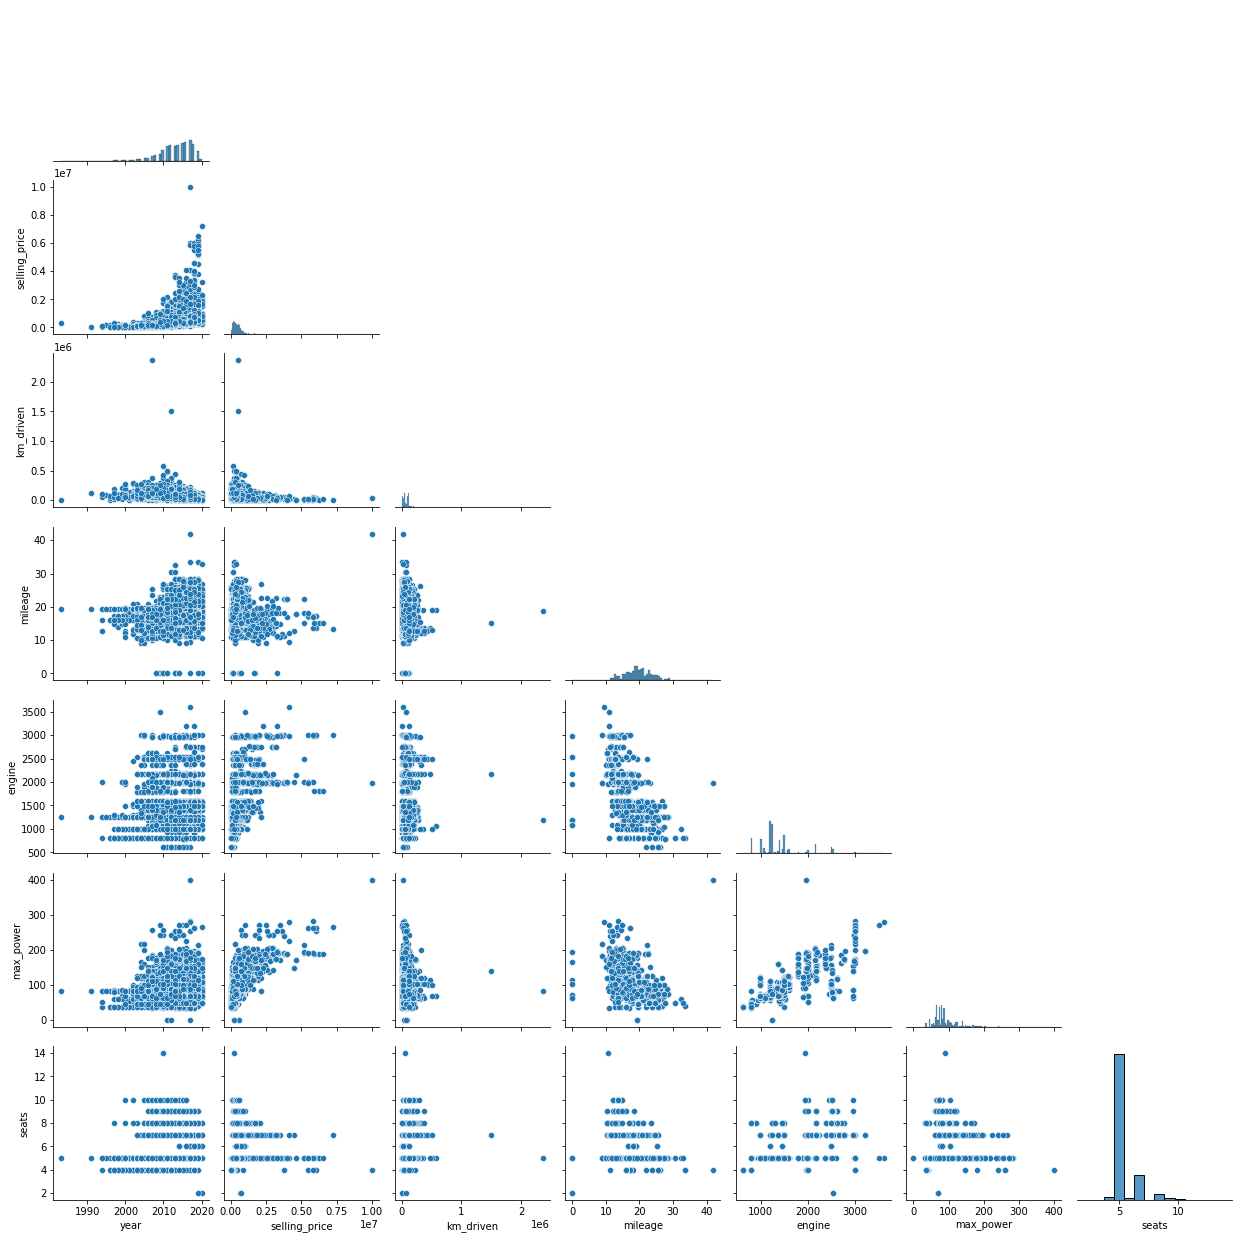

In [326]:
sns.pairplot(df_train, kind='scatter', corner=True)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [327]:
print(
'''
Связь selling_price с:\n
- year - кажется, что у более молодых машин больше разброс по цене и больше выбросов в сторону большей цены
    (да и в целом вроде как больше цена, но корреляция, мне кажется, будет так себе)
    
- km_driven - из-за выбросов не очень хорошо видно, но логично предположить, что selling_price тем больше,
    чем меньше km_driven - слабая отрицательная корреляция

- mileage - кажется, что какой-то явной корреляции нет - у машин с большей ценой меньше размах по mileage
    
- engine - чем выше engine, тем больше вариативность по selling_price, и, как будто, есть положительная корреляция
    
- max_power - вот тут вроде как даже похоже на положительную корреляцию с таргетом, - думаю, визуально нам
    историю портит выброс в правом верхнем углу
    
- seats - т.к. легковые авто чаще всего имеют 5 сидений, вариативность по цене у них намного больше, чем у
    авто с большим кол-вом сидений
'''
)


Связь selling_price с:

- year - кажется, что у более молодых машин больше разброс по цене и больше выбросов в сторону большей цены
    (да и в целом вроде как больше цена, но корреляция, мне кажется, будет так себе)
    
- km_driven - из-за выбросов не очень хорошо видно, но логично предположить, что selling_price тем больше,
    чем меньше km_driven - слабая отрицательная корреляция

- mileage - кажется, что какой-то явной корреляции нет - у машин с большей ценой меньше размах по mileage
    
- engine - чем выше engine, тем больше вариативность по selling_price, и, как будто, есть положительная корреляция
    
- max_power - вот тут вроде как даже похоже на положительную корреляцию с таргетом, - думаю, визуально нам
    историю портит выброс в правом верхнем углу
    
- seats - т.к. легковые авто чаще всего имеют 5 сидений, вариативность по цене у них намного больше, чем у
    авто с большим кол-вом сидений



(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

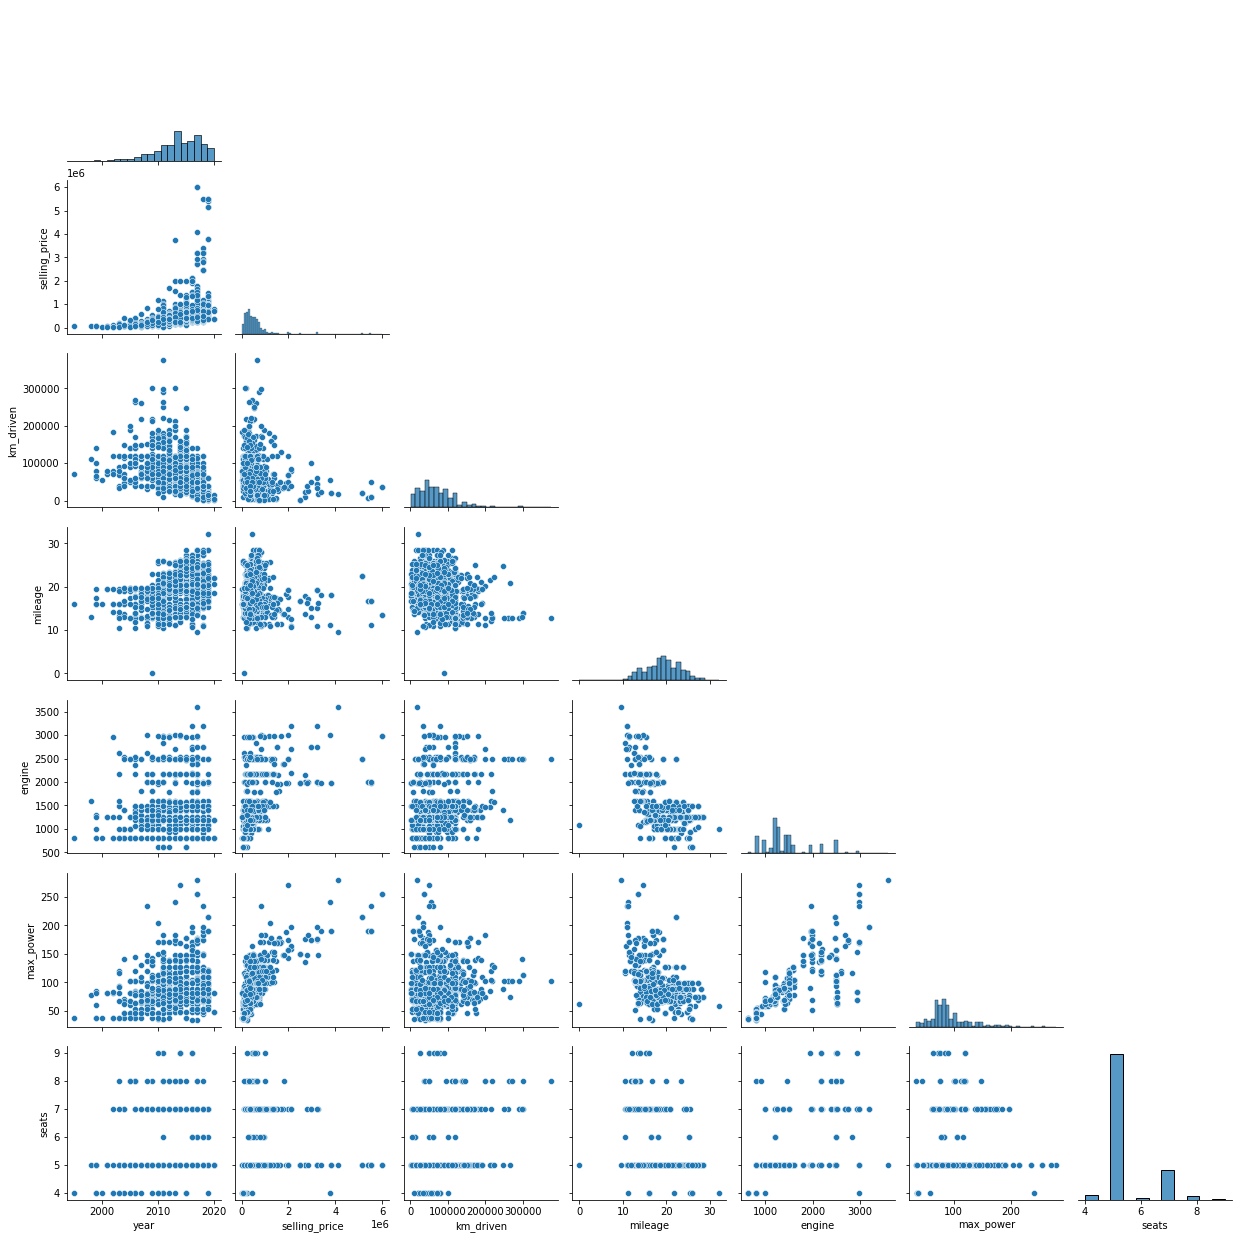

In [328]:
sns.pairplot(df_test, kind='scatter', corner=True);

In [329]:
print(
'''В целом при разделении на train и test совокупности оказались похожими'''
)

В целом при разделении на train и test совокупности оказались похожими


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [330]:
numerical_cols = df_train.columns[df_train.dtypes != object]
correlations = df_train[numerical_cols].corr()

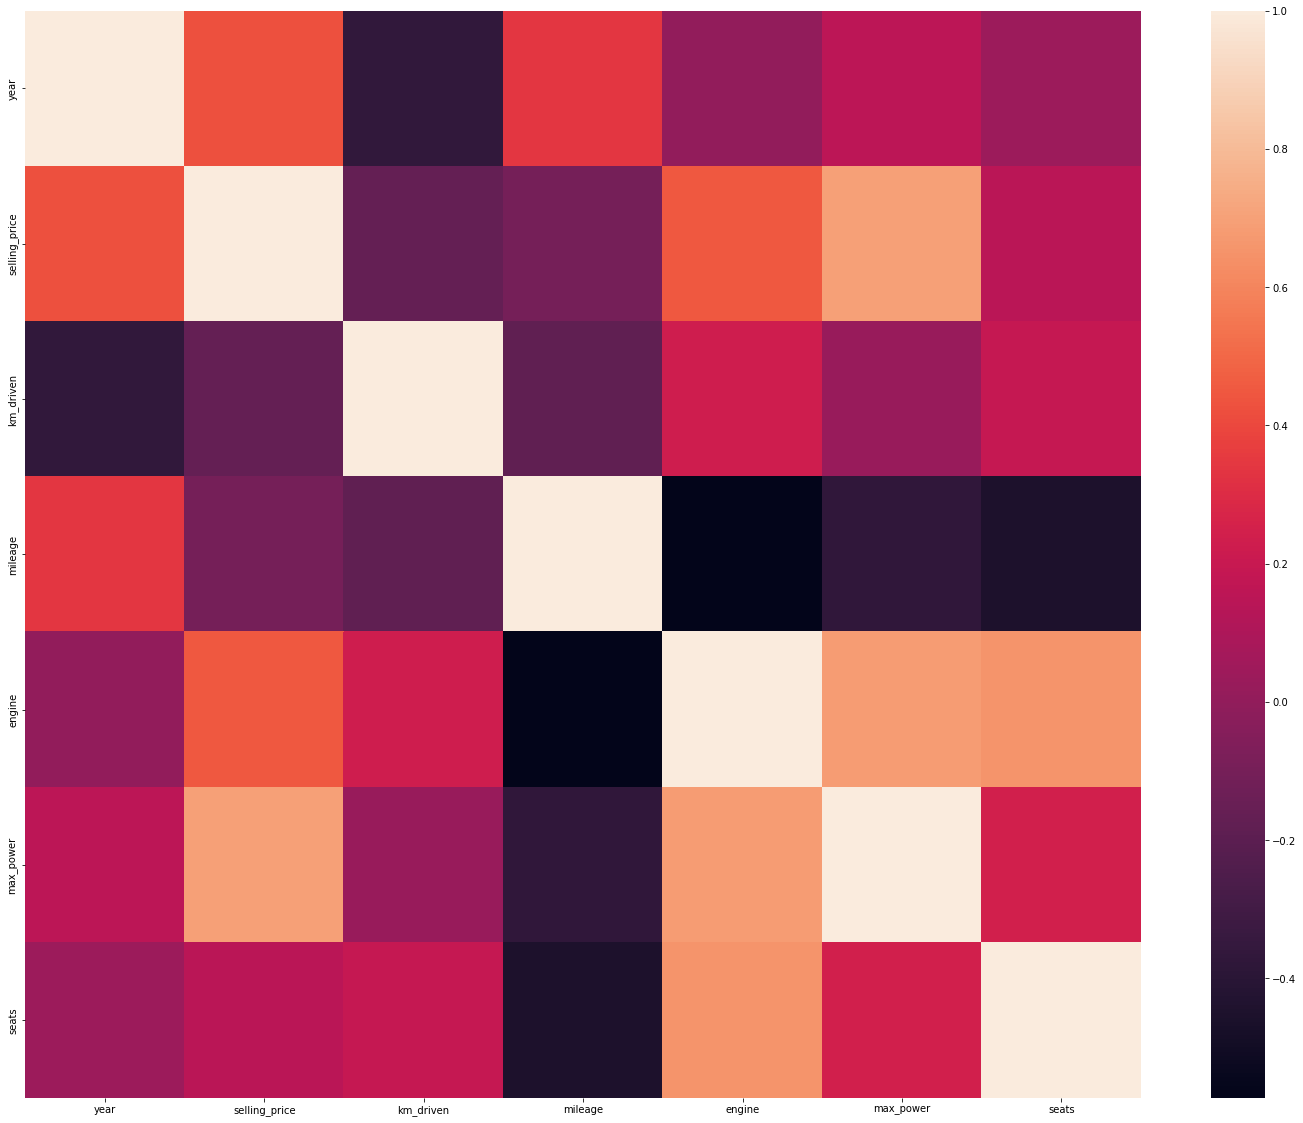

In [331]:
fig, ax = plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(20)
fig = sns.heatmap(correlations)

In [332]:
correlations

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.156858,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692814,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024588,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.373390,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681117,0.652172
max_power,0.156858,0.692814,0.024588,-0.373390,0.681117,1.000000,0.244112
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244112,1.000000


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [333]:
print(
'''
Наименее скоррелированы между собой признаки max_power и km_driven (если я не дальтоник)

Довольно сильная + зависимость - selling_price и max_power, engine и max_power.
engine и seats вряд ли можно назвать линейной...

Опираясь только на данные - нет, потому что корреляция не говорит о причинно-следственной связи
и потому что в данном датасете она слабая. Опираясь на данные и на здравый смысл - скорее да)
''')


Наименее скоррелированы между собой признаки max_power и km_driven (если я не дальтоник)

Довольно сильная + зависимость - selling_price и max_power, engine и max_power.
engine и seats вряд ли можно назвать линейной...

Опираясь только на данные - нет, потому что корреляция не говорит о причинно-следственной связи
и потому что в данном датасете она слабая. Опираясь на данные и на здравый смысл - скорее да)



(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

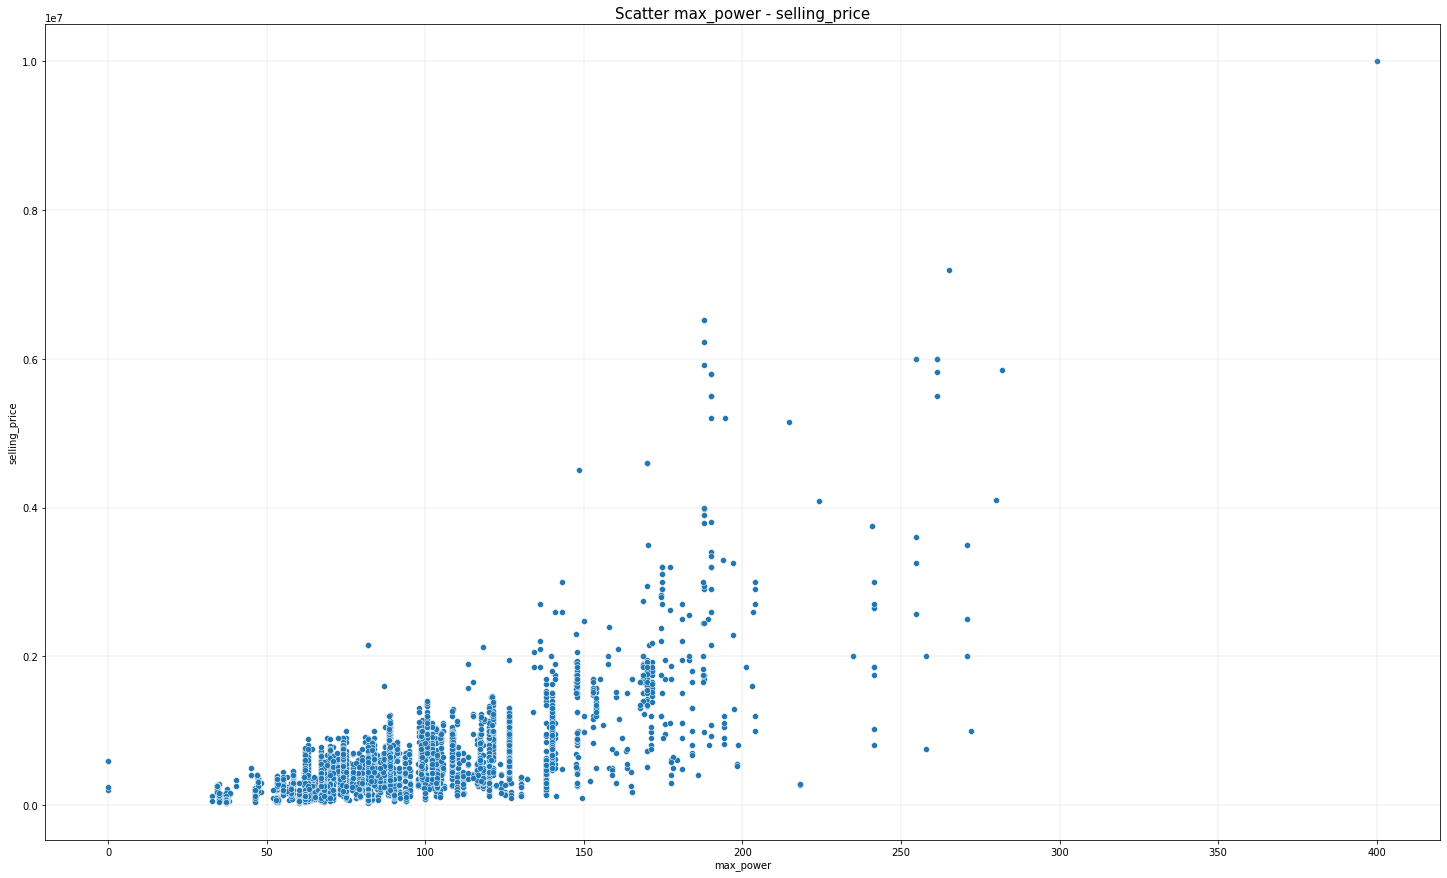

In [334]:
fig, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(ax=ax, x=df_train['max_power'], y=df_train['selling_price'])
ax.grid(linewidth=0.2)
ax.set_title('Scatter max_power - selling_price', fontsize=15);

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [335]:
print(
'''
На самом деле я бы посмотрел на скаттеры наиболее скореллированных величин, а ещё было бы круто, если без выбросов
Мне кажется это важным, чтобы понять, коллинеарны ли эти признаки, или же зависимость нелинейна - если коллинеарны, то
в перспективе можно один признак выразить через другой
'''
)


На самом деле я бы посмотрел на скаттеры наиболее скореллированных величин, а ещё было бы круто, если без выбросов
Мне кажется это важным, чтобы понять, коллинеарны ли эти признаки, или же зависимость нелинейна - если коллинеарны, то
в перспективе можно один признак выразить через другой



In [336]:
# selling_price и max_power
# engine и max_power
# engine и seats

In [337]:
# Посчитаем 5-ый и 95-ый перцентили для каждого признака
left_IQR_mp = df_train.max_power.quantile(.05)
right_IQR_mp = df_train.max_power.quantile(.95)

left_IQR_sp = df_train.selling_price.quantile(.05)
right_IQR_sp = df_train.selling_price.quantile(.95)

left_IQR_e = df_train.engine.quantile(.05)
right_IQR_e = df_train.engine.quantile(.95)

left_IQR_s = df_train.seats.quantile(.05)
right_IQR_s = df_train.seats.quantile(.95)

## selling_price и max_power

In [338]:
no_outliers_mp_sp = \
df_train[['max_power', 'selling_price']]\
        .loc[(df_train['max_power'] > left_IQR_mp) & (df_train['max_power'] < right_IQR_mp)]\
        .loc[(df_train['selling_price'] > left_IQR_sp) & (df_train['selling_price'] < right_IQR_sp)]

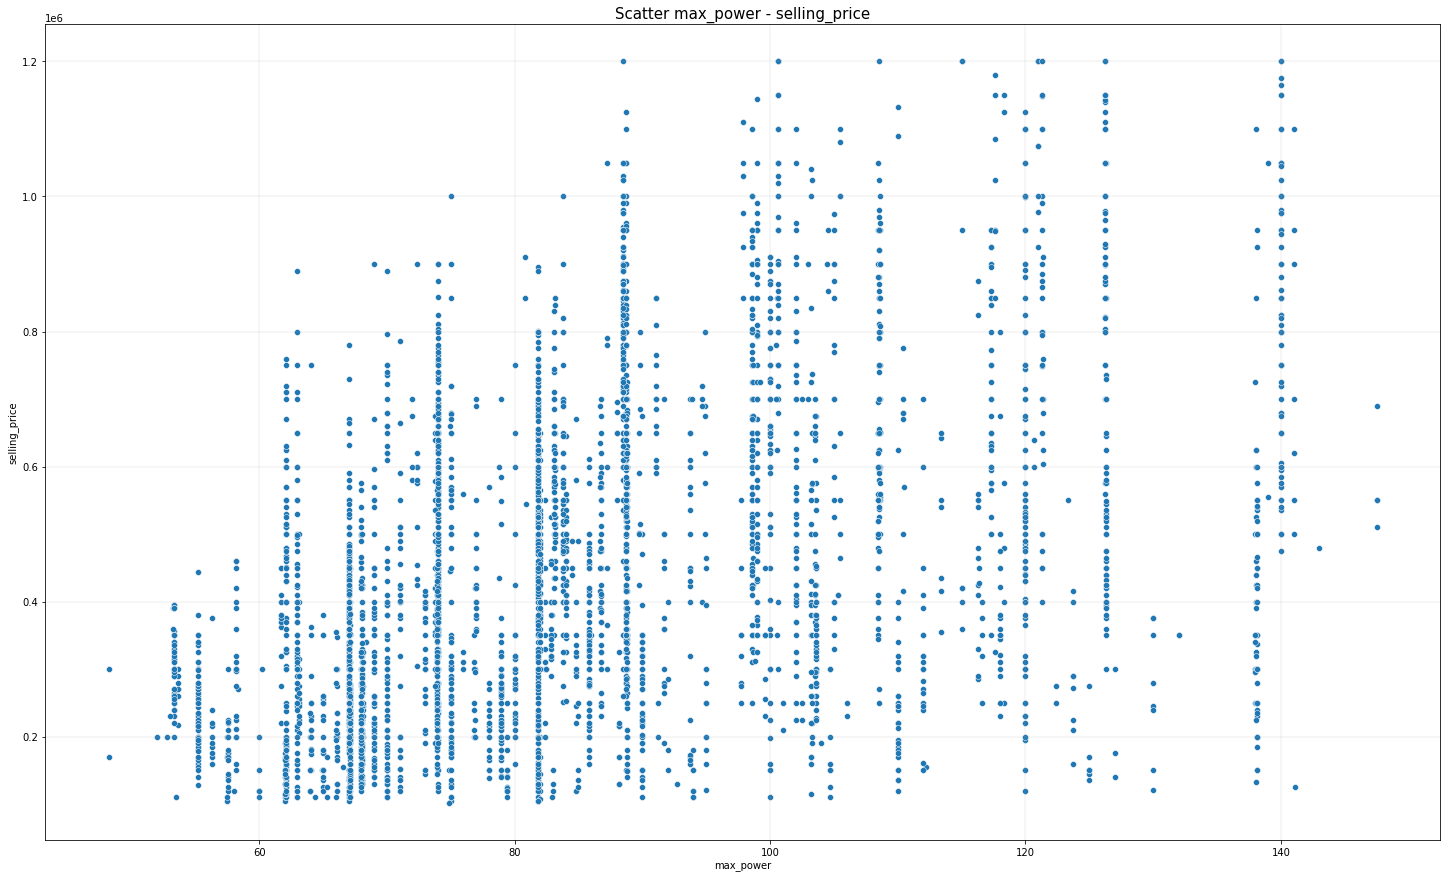

In [339]:
fig, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(ax=ax, x=no_outliers_mp_sp['max_power'], y=no_outliers_mp_sp['selling_price'])
ax.grid(linewidth=0.2)
ax.set_title('Scatter max_power - selling_price', fontsize=15);

In [340]:
no_outliers_mp_sp.corr()

,max_power,selling_price
max_power,1.000000,0.456771
selling_price,0.456771,1.000000


In [341]:
print(
'''max_power - selling_price действительно хорошо линейно скореллированы, -
даже после отбрасывания выбросов R > 0.4

Что интересно - после отбрасывания выбросов R уменьшился - кажется,
что для авто с большим max_power корреляция становится более линейной'''
)

max_power - selling_price действительно хорошо линейно скореллированы, -
даже после отбрасывания выбросов R > 0.4

Что интересно - после отбрасывания выбросов R уменьшился - кажется,
что для авто с большим max_power корреляция становится более линейной


## engine и max_power

In [342]:
no_outliers_mp_e = \
df_train[['max_power', 'engine']]\
        .loc[(df_train['max_power'] > left_IQR_mp) & (df_train['max_power'] < right_IQR_mp)]\
        .loc[(df_train['engine'] > left_IQR_e) & (df_train['engine'] < right_IQR_e)]

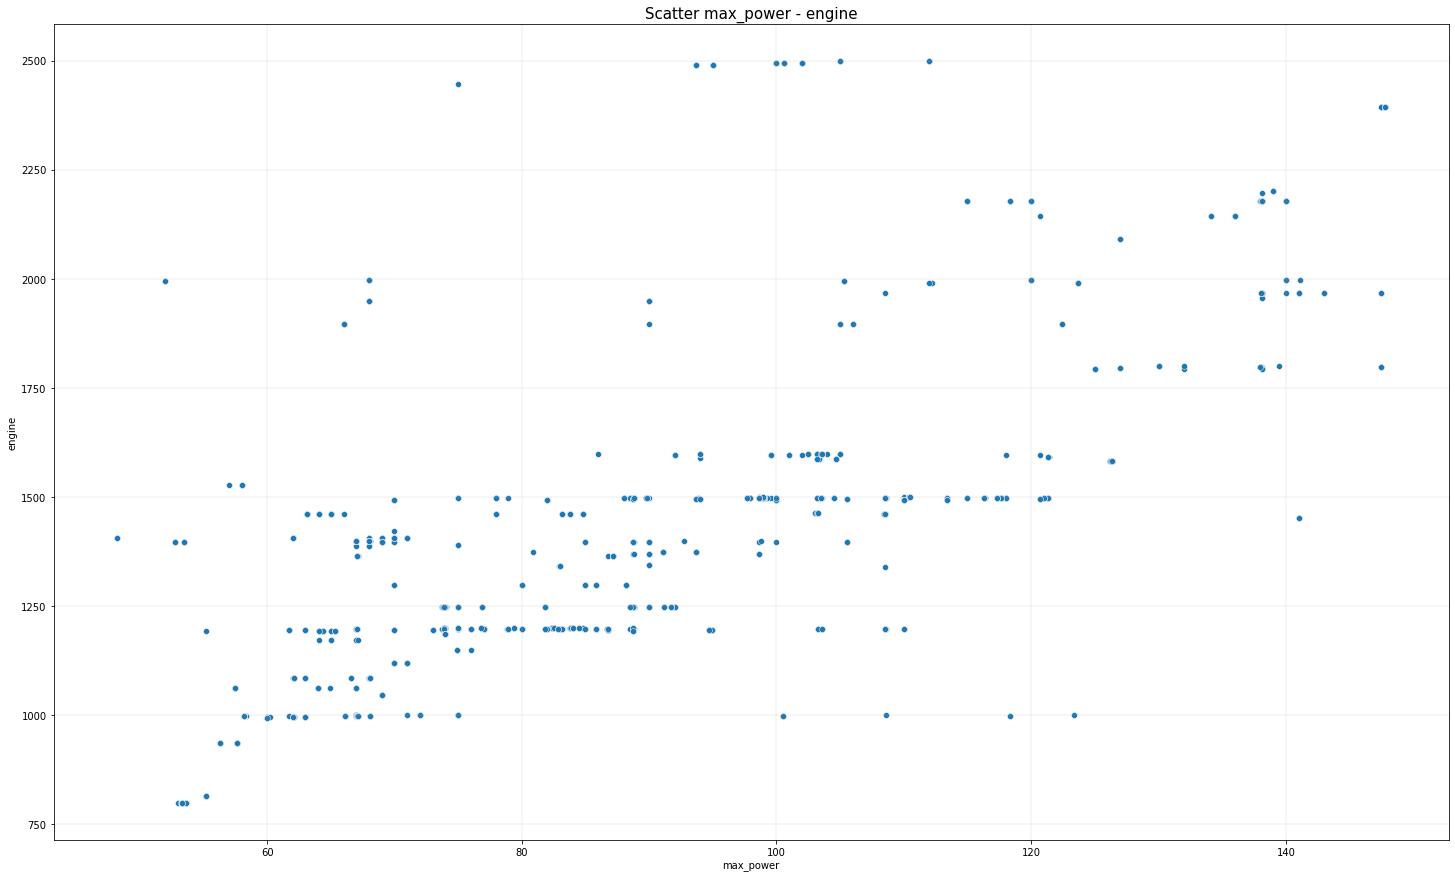

In [343]:
fig, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(ax=ax, x=no_outliers_mp_e['max_power'], y=no_outliers_mp_e['engine'])
ax.grid(linewidth=0.2)
ax.set_title('Scatter max_power - engine',fontsize=15);

In [344]:
no_outliers_mp_e.corr()

,max_power,engine
max_power,1.000000,0.741585
engine,0.741585,1.000000


In [345]:
print(
'''max_power - engine действительно сильно линейно скореллированы, после отбрасывания выбросов R > 0.74,
что (возможно) может привести к переобучению'''
)

max_power - engine действительно сильно линейно скореллированы, после отбрасывания выбросов R > 0.74,
что (возможно) может привести к переобучению


## engine и seats

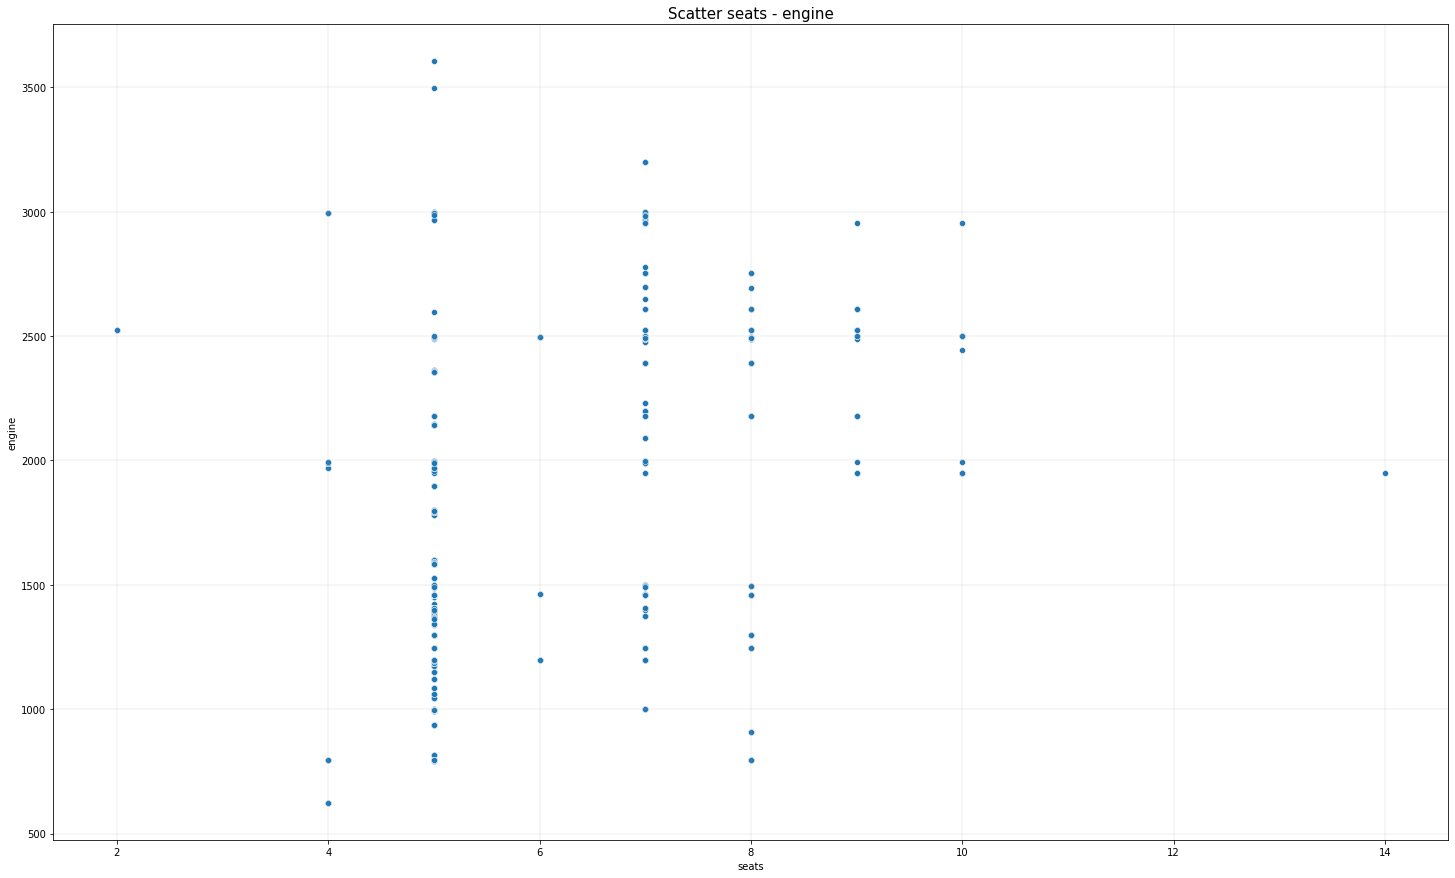

In [346]:
# В случае с seats-engine не будем удалять выбросы - в силу дискретности и малом кол-ве уник значений seats
# интереснее посмотреть на сам график в хорошем масштабе
fig, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(ax=ax, x=df_train['seats'], y=df_train['engine'])
ax.grid(linewidth=0.2)
ax.set_title('Scatter seats - engine',fontsize=15);

In [347]:
df_train[['seats', 'engine']].corr()

,seats,engine
seats,1.000000,0.652172
engine,0.652172,1.000000


In [348]:
print(
'''
Кажется, признаки действительно сильно скореллированы, что логично - авто с большей вместимостью нужен движок получше
Однако в силу категориальности seats не уверен, насколько всерьёз, и как правильно стоит воспринимать эту зависимость
''')


Кажется, признаки действительно сильно скореллированы, что логично - авто с большей вместимостью нужен движок получше
Однако в силу категориальности seats не уверен, насколько всерьёз, и как правильно стоит воспринимать эту зависимость



# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [349]:
y_train = df_train['selling_price'].to_numpy()
X_train = df_train[numerical_cols].drop(columns='selling_price').to_numpy() #numerical_cols объявлял перед построением heatmap

In [350]:
assert X_train.shape == (5840, 6)

In [351]:
y_test = df_test['selling_price'].to_numpy()
X_test = df_test[numerical_cols].drop(columns='selling_price').to_numpy() #numerical_cols объявлял перед построением heatmap

In [352]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [353]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

reg = LinearRegression().fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

r2_scores = pd.Series({
                       'r2_train'   : r2_score(y_train, pred_train),
                       'r2_test'    : r2_score(y_test, pred_test)
                      })
mses = pd.Series({
                  'mse_train'   : MSE(y_train, pred_train),
                  'mse_test'    : MSE(y_test, pred_test)
                 })

print(r2_scores, '\n')
print(mses)

r2_train    0.592259
r2_test     0.594142
dtype: float64 

mse_train    1.168742e+11
mse_test     2.332988e+11
dtype: float64


In [354]:
reg.coef_

array([ 3.73046278e+04, -7.35171703e-01,  7.23446787e+03,  1.25979854e+02,
        1.02032467e+04, -2.36283023e+04])

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [355]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
normalizer.fit(X_train)

X_train_scaled = normalizer.transform(X_train)
X_test_scaled = normalizer.transform(X_test)


reg_norm = LinearRegression().fit(X_train_scaled, y_train)

pred_train_norm = reg.predict(X_train_scaled)
pred_test_norm = reg.predict(X_test_scaled)

r2_scores = pd.Series({
                        'r2_train'   : r2_score(y_train, pred_train_norm),
                        'r2_test'    : r2_score(y_test, pred_test_norm)
                      })
mses = pd.Series({
                        'mse_train'   : MSE(y_train, pred_train_norm),
                        'mse_test'    : MSE(y_test, pred_test_norm)
                      })

print(r2_scores, '\n')
print(mses)

r2_train   -20227.832319
r2_test    -10110.789983
dtype: float64 

mse_train    5.798359e+15
mse_test     5.812546e+15
dtype: float64


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [356]:
df_train[numerical_cols].drop(columns='selling_price').columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

In [357]:
reg.coef_

array([ 3.73046278e+04, -7.35171703e-01,  7.23446787e+03,  1.25979854e+02,
        1.02032467e+04, -2.36283023e+04])

In [358]:
print(
'''
Наиболее информативным оказался признак year (почему-то)
'''
)


Наиболее информативным оказался признак year (почему-то)



(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

## Просто L1

In [359]:
from sklearn.linear_model import Lasso 

In [360]:
lasso_reg = Lasso().fit(X_train_scaled, y_train)

pred_train_l1 = lasso_reg.predict(X_train_scaled)
pred_test_l1  = lasso_reg.predict(X_test_scaled)

r2_scores = pd.Series({
                        'r2_train'   : r2_score(y_train, pred_train_l1),
                        'r2_test'    : r2_score(y_test, pred_test_l1)
                      })
mses = pd.Series({
                        'mse_train'   : MSE(y_train, pred_train_l1),
                        'mse_test'    : MSE(y_test, pred_test_l1)
                      })

print(r2_scores, '\n')
print(mses)

r2_train    0.592259
r2_test     0.594141
dtype: float64 

mse_train    1.168742e+11
mse_test     2.332995e+11
dtype: float64


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [361]:
lasso_reg.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

In [362]:
print(
'''
Не занулила, так как параметр альфа, по сути, регулирует размер штрафа модели за переобучение, и его нужно настраивать,
чего мы не сделали
''')


Не занулила, так как параметр альфа, по сути, регулирует размер штрафа модели за переобучение, и его нужно настраивать,
чего мы не сделали



(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

## Сложно L1 (GridSearch): поиск

In [363]:
%%time
from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso()

alphas = np.arange(10000, 100000, 10)

clf = GridSearchCV(lasso_reg, [{"alpha": alphas}], cv=10, refit=False)
clf.fit(X_train_scaled, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

CPU times: user 5min 34s, sys: 4min 21s, total: 9min 56s
Wall time: 5min 18s


In [364]:
scores;

(10010, 99990)

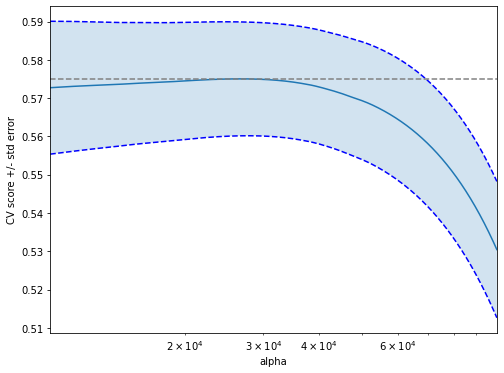

In [365]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(10)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[1], alphas[-1]])

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [366]:
print(
'''
С моим кол-вом итераций - около 4 минут 29 секунд
''')


С моим кол-вом итераций - около 4 минут 29 секунд



In [367]:
results = pd.DataFrame(clf.cv_results_)

In [368]:
scores.max()

0.5750274764701039

In [369]:
results[results['mean_test_score'] == results['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1661,0.001947,0.000044,0.000613,0.000014,26610,{'alpha': 26610},0.531481,0.582727,0.63088,0.587814,0.551829,0.639238,0.476844,0.623136,0.563604,0.562722,0.575027,0.047049,1


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [370]:
print(
f'''
Коэфф регуляризации у лучшей из перебранных моделей равен
{results[results['mean_test_score'] == results['mean_test_score'].max()].params.values[0]['alpha']}
''')



Коэфф регуляризации у лучшей из перебранных моделей равен
26610



## Сложно L1 (GridSearch): оптимальный alpha

In [371]:
lasso_reg = Lasso(alpha=results[results['mean_test_score'] == results['mean_test_score'].max()].params.values[0]['alpha']).fit(X_train_scaled, y_train)
# lasso_reg = pickle.load(open('lasso_hw_1_alpha_26610.pckl', mode='rb'))

pred_train_l1 = lasso_reg.predict(X_train_scaled)
pred_test_l1  = lasso_reg.predict(X_test_scaled)

r2_scores_l1_opt = pd.Series({
                               'r2_train'   : r2_score(y_train, pred_train_l1),
                               'r2_test'    : r2_score(y_test, pred_test_l1)
                             })
mses_l1_opt = pd.Series({
                        'mse_train'   : MSE(y_train, pred_train_l1),
                        'mse_test'    : MSE(y_test, pred_test_l1)
                      })

print(r2_scores_l1_opt, '\n')
print(mses_l1_opt)

r2_train    0.582581
r2_test     0.564508
dtype: float64 

mse_train    1.196483e+11
mse_test     2.503334e+11
dtype: float64


In [372]:
# import pickle
# pickle.dump(lasso_reg, open('lasso_hw_1_alpha_26610.pckl', 'wb'))

In [373]:
df_train[numerical_cols].drop(columns='selling_price').columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

In [374]:
lasso_reg.coef_

array([145859.12549681, -15732.79454485,      0.        ,      0.        ,
       321820.62740444,     -0.        ])

In [375]:
print(
f'''
При L1 с оптимальным alpha занулились веса при mileage, engine, seats
''')



При L1 с оптимальным alpha занулились веса при mileage, engine, seats



## Сложно ElasticNet (GridSearch): поиск

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [376]:
%%time
from sklearn.linear_model import ElasticNet

elnet_reg = ElasticNet()

alphas = np.arange(10e-4, 10, 0.05)
l1_ratios = np.arange(0.1, 1, 0.1)

clf_elnet = GridSearchCV(elnet_reg, [{"alpha": alphas, 'l1_ratio' : l1_ratios}], cv=10, refit=False)
clf_elnet.fit(X_train_scaled, y_train)
scores_elnet = clf_elnet.cv_results_["mean_test_score"]
scores_elnet_std = clf_elnet.cv_results_["std_test_score"]

CPU times: user 1min 10s, sys: 55.6 s, total: 2min 6s
Wall time: 1min 6s


In [377]:
scores_elnet;

In [378]:
results = pd.DataFrame(clf_elnet.cv_results_)

In [379]:
results[results['mean_test_score'] == results['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
269,0.002623,0.000043,0.000665,0.000015,1.451,0.9,"{'alpha': 1.451, 'l1_ratio': 0.9}",0.52024,0.609662,0.645605,0.593643,0.490663,0.647158,0.468517,0.633812,0.594508,0.56393,0.576774,0.060927,1


In [380]:
max_alpha_elnet = results[results['mean_test_score'] == results['mean_test_score'].max()].params.values[0]['alpha']
max_l1_ratio_elnet = results[results['mean_test_score'] == results['mean_test_score'].max()].params.values[0]['l1_ratio']

## Сложно ElasticNet (GridSearch): оптимальный alpha

In [381]:
elnet_reg = ElasticNet(alpha=max_alpha_elnet, l1_ratio=max_l1_ratio_elnet).fit(X_train_scaled, y_train)
# elnet_reg = pickle.load(open('elnet_reg_hw_1_alpha_1.451_l1_ratio_0.9.pckl', mode='rb'))

pred_train_elnet = elnet_reg.predict(X_train_scaled)
pred_test_elnet  = elnet_reg.predict(X_test_scaled)

r2_scores_elnet_opt = pd.Series({
                        'r2_train'   : r2_score(y_train, pred_train_elnet),
                        'r2_test'    : r2_score(y_test, pred_test_elnet)
                      })
mses_elnet_opt = pd.Series({
                        'mse_train'   : MSE(y_train, pred_train_elnet),
                        'mse_test'    : MSE(y_test, pred_test_elnet)
                      })

print(r2_scores_elnet_opt, '\n')
print(mses_elnet_opt)

r2_train    0.584942
r2_test     0.562559
dtype: float64 

mse_train    1.189717e+11
mse_test     2.514534e+11
dtype: float64


In [382]:
# pickle.dump(elnet_reg, open('elnet_reg_hw_1_alpha_1.451_l1_ratio_0.9.pckl', 'wb'))

In [383]:
print('L1 optimal')
print(r2_scores_l1_opt, '\n')
print(mses_l1_opt)
print('\n\n')

print('Elnet optimal')
print(r2_scores_elnet_opt, '\n')
print(mses_elnet_opt)

L1 optimal
r2_train    0.582581
r2_test     0.564508
dtype: float64 

mse_train    1.196483e+11
mse_test     2.503334e+11
dtype: float64



Elnet optimal
r2_train    0.584942
r2_test     0.562559
dtype: float64 

mse_train    1.189717e+11
mse_test     2.514534e+11
dtype: float64


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [384]:
print(f'{results[results["mean_test_score"] == results["mean_test_score"].max()].params.values[0]}, т.е. уклон идёт в регуляризацию l1')

{'alpha': 1.451, 'l1_ratio': 0.9}, т.е. уклон идёт в регуляризацию l1


In [385]:
df_train[numerical_cols].drop(columns='selling_price').columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

In [386]:
elnet_reg.coef_

array([142649.65381517, -46195.72774767,  20599.0413968 ,  82231.80299963,
       268108.65147528, -23134.60581236])

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [387]:
X_train_cat = df_train.drop(columns=['selling_price', 'name'])

In [388]:
assert X_train_cat.shape == (5840, 10)

In [389]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [390]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

In [391]:
# X_train_cat_coded = pd.get_dummies(X_train_cat, drop_first=True)

In [392]:
# X_train_cat.dtypes== object

In [393]:
# X_train_cat[X_train_cat.columns[X_train_cat.dtypes == object]]

In [394]:
enc = OneHotEncoder()
enc.fit(X_train_cat[X_train_cat.columns[X_train_cat.dtypes == object]])

# pickle.dump(enc, open('ONE.pckl', mode='wb'))

X_train_cat_coded = pd.DataFrame(enc.transform( X_train_cat[X_train_cat.columns[X_train_cat.dtypes == object]] ).toarray(), columns=enc.get_feature_names_out())

# Уберём лишний столбец
X_train_cat_coded = X_train_cat_coded[X_train_cat_coded.columns[:-1]]
X_train_cat_coded.head()

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [395]:
X_train_cat_coded = pd.concat([
                                X_train_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']],
                                X_train_cat_coded], axis=1)

In [423]:
X_train_cat_coded

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car
0,2014,145500,23.40,1248,74.00,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2010,127000,23.00,1396,90.00,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5837,2013,110000,18.50,1197,82.85,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [396]:
# А это ок, что мы кодируем признаки в df_train и потом не масштабируем, хотя до этого масштабировали их в отдельных X_train и X_test?

## Сложно L2 (GridSearch): поиск

In [397]:
#Берём некатегориальные столбцы и масштабируем train и test по ним
normalizer = StandardScaler()
normalizer.fit(X_train_cat_coded[X_train_cat_coded.columns[:6]].to_numpy())

# pickle.dump(normalizer, open('scaler.pckl', mode='wb'))

X_train_scaled = normalizer.transform(X_train_cat_coded[X_train_cat_coded.columns[:6]].to_numpy())
X_test_scaled = normalizer.transform(X_test)

In [398]:
# Не забываем про вещественные признаки!
X_train_scaled_full_features = pd.DataFrame(X_train_scaled).merge(X_train_cat_coded[X_train_cat_coded.columns[6:]], how='inner', left_index=True, right_index=True).to_numpy()

In [399]:
%%time
from sklearn.linear_model import Ridge

ridge_reg = Ridge().fit(X_train_scaled_full_features, y_train)

alphas = np.arange(1, 50E2, 1)

clf_l2 = GridSearchCV(ridge_reg, [{"alpha": alphas}], scoring='r2', cv=10, refit=False)
clf_l2.fit(X_train_scaled_full_features, y_train)
scores_l2 = clf_l2.cv_results_["mean_test_score"]
scores_l2_std = clf_l2.cv_results_["std_test_score"]

CPU times: user 4min 7s, sys: 3min 19s, total: 7min 26s
Wall time: 3min 51s


In [400]:
scores_l2.max()

0.6058884662760062

(1.0, 4999.0)

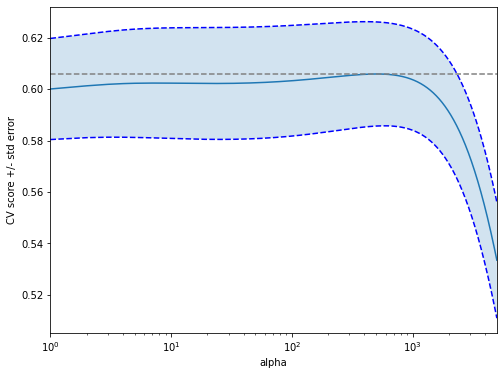

In [401]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores_l2)

std_error = scores_l2_std / np.sqrt(10)

plt.semilogx(alphas, scores_l2 + std_error, "b--")
plt.semilogx(alphas, scores_l2 - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores_l2 + std_error, scores_l2 - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores_l2), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [402]:
results = pd.DataFrame(clf_l2.cv_results_)

In [403]:
results[results['mean_test_score'] == results['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
505,0.003015,0.000028,0.000657,0.000009,506.0,{'alpha': 506.0},0.560782,0.640727,0.677142,0.615778,0.500772,0.684875,0.50027,0.656008,0.638779,0.583751,0.605888,0.063993,1


In [404]:
print(
f'''
Качество удалось улучшить до {scores_l2.max()}
''')


Качество удалось улучшить до 0.6058884662760062



In [405]:
max_alpha_ridge = results[results['mean_test_score'] == results['mean_test_score'].max()]['params'].values[0]['alpha']

## Сложно L2 (GridSearch): оптимальный alpha

In [406]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,7
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,5
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130.0,5
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,5
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65.0,5


In [407]:
# И не забываем закодировать категориальные признаки на тесте + добавить заскейленные вещественные!
df_test = df_test.drop(columns='name')
df_test_coded = pd.DataFrame(enc.transform( df_test[df_test.columns[df_test.dtypes == object]] ).toarray(), columns=enc.get_feature_names_out())

# Уберём лишний столбец
df_test_coded = df_test_coded[df_test_coded.columns[:-1]]
df_test_coded.head()

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [408]:
df_test_coded = pd.concat([
                          df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']],
                          df_test_coded], axis=1)

In [409]:
X_test_scaled_full_features = pd.DataFrame(X_test_scaled).merge(df_test_coded[df_test_coded.columns[6:]], how='inner', left_index=True, right_index=True).to_numpy()

In [410]:
ridge_reg = Ridge(alpha=max_alpha_ridge).fit(X_train_scaled_full_features, y_train)
# ridge_reg = pickle.load(open('ridge_hw_1_alpha_116.pckl', mode='rb'))

pred_train_l2 = ridge_reg.predict(X_train_scaled_full_features)
pred_test_l2  = ridge_reg.predict(X_test_scaled_full_features)

r2_scores_l2_opt = pd.Series({
                        'r2_train'   : r2_score(y_train, pred_train_l2),
                        'r2_test'    : r2_score(y_test, pred_test_l2)
                      })
mses_l2_opt = pd.Series({
                        'mse_train'   : MSE(y_train, pred_train_l2),
                        'mse_test'    : MSE(y_test, pred_test_l2)
                      })

print(r2_scores_l2_opt, '\n')
print(mses_l2_opt)

r2_train    0.618103
r2_test     0.617023
dtype: float64 

mse_train    1.094663e+11
mse_test     2.201461e+11
dtype: float64


In [411]:
# import pickle
# pickle.dump(ridge_reg, open('ridge_hw_1_alpha_506.pckl', 'wb'))

In [412]:
print('L1 optimal')
print(r2_scores_l1_opt, '\n')
print(mses_l1_opt)
print('\n\n')

print('Elnet optimal')
print(r2_scores_elnet_opt, '\n')
print(mses_elnet_opt)
print('\n\n')

print('L2 optimal')
print(r2_scores_l2_opt, '\n')
print(mses_l2_opt)

L1 optimal
r2_train    0.582581
r2_test     0.564508
dtype: float64 

mse_train    1.196483e+11
mse_test     2.503334e+11
dtype: float64



Elnet optimal
r2_train    0.584942
r2_test     0.562559
dtype: float64 

mse_train    1.189717e+11
mse_test     2.514534e+11
dtype: float64



L2 optimal
r2_train    0.618103
r2_test     0.617023
dtype: float64 

mse_train    1.094663e+11
mse_test     2.201461e+11
dtype: float64


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [413]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [414]:
def business_metrics(y_true, y_pred):
    abs_diff = np.abs(y_pred - y_true)
    prop_of_true = abs_diff / y_true * 100
    return np.sum(prop_of_true <= 10) / y_true.shape[0] * 100

business_metrics(df_test.selling_price.values, pred_test_l2)

22.7

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

In [417]:
d = pickle.load(open('ridge_hw_1_alpha_506.pckl', mode='rb'))

In [437]:
# Веса
pd.DataFrame([d.coef_], columns=X_train_cat_coded.columns)

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car
0,132705.748284,-39679.015013,18020.826611,62659.994687,255773.17811,-17365.277807,-775.942169,21780.812921,6542.571533,-27547.442285,51826.242027,-48875.96592,-2950.276107,107460.732944,-107460.732944,27711.144217,-5335.184895,-25464.664024,26896.636612


In [438]:
d.get_params()

{'alpha': 506.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}